In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition-new.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  312 non-null    object 
 1   xbox    312 non-null    float64
 2   ybox    312 non-null    float64
 3   width   312 non-null    int64  
 4   height  312 non-null    int64  
 5   onpix   312 non-null    int64  
 6   xbar    312 non-null    float64
 7   ybar    312 non-null    float64
 8   x2bar   312 non-null    float64
 9   y2bar   312 non-null    float64
 10  xybar   312 non-null    float64
 11  x2ybar  312 non-null    float64
 12  xy2bar  312 non-null    float64
 13  xedge   312 non-null    float64
 14  xedgey  312 non-null    int64  
 15  yedge   312 non-null    float64
 16  yedgex  312 non-null    int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 41.6+ KB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,20.799679,22.120192,22.298077,29.490385,239.487179,-0.033962,-0.011522,52.614223,89.025159,1.235632,-44.177597,-38.330246,2.508851,1183.756410,1.260679,881.759615
std,2.323672,0.802414,6.551129,3.547551,82.382723,0.085824,0.058182,28.556211,26.024969,7.196840,160.420290,124.900283,1.692701,448.919867,0.467147,334.589939
min,12.000000,19.000000,2.000000,23.000000,69.000000,-0.280000,-0.193548,0.652174,35.968121,-23.211538,-579.053363,-386.151316,1.185185,564.000000,0.090909,66.000000
25%,19.500000,22.000000,19.000000,27.750000,183.750000,-0.076480,-0.026191,32.652961,70.820402,-0.528678,-104.683115,-111.472895,1.902709,836.000000,0.875000,609.500000
50%,21.000000,22.000000,23.000000,30.000000,229.500000,-0.008145,-0.003661,47.927029,85.166825,0.684491,-1.393637,-10.182555,2.195238,1140.500000,1.290995,878.000000
75%,22.500000,22.500000,26.000000,32.000000,299.500000,0.003122,0.010583,74.285454,105.952899,5.611994,24.777666,11.423554,2.666667,1379.250000,1.600000,1135.500000
max,27.000000,24.500000,41.000000,41.000000,457.000000,0.311494,0.201299,133.152256,164.317308,24.776675,466.047249,355.161137,17.000000,3158.000000,2.300000,1648.000000


In [5]:
y = dataf.pop('letter')

In [6]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df

In [7]:
dataf_norm = norm(dataf)

<function matplotlib.pyplot.show(close=None, block=None)>

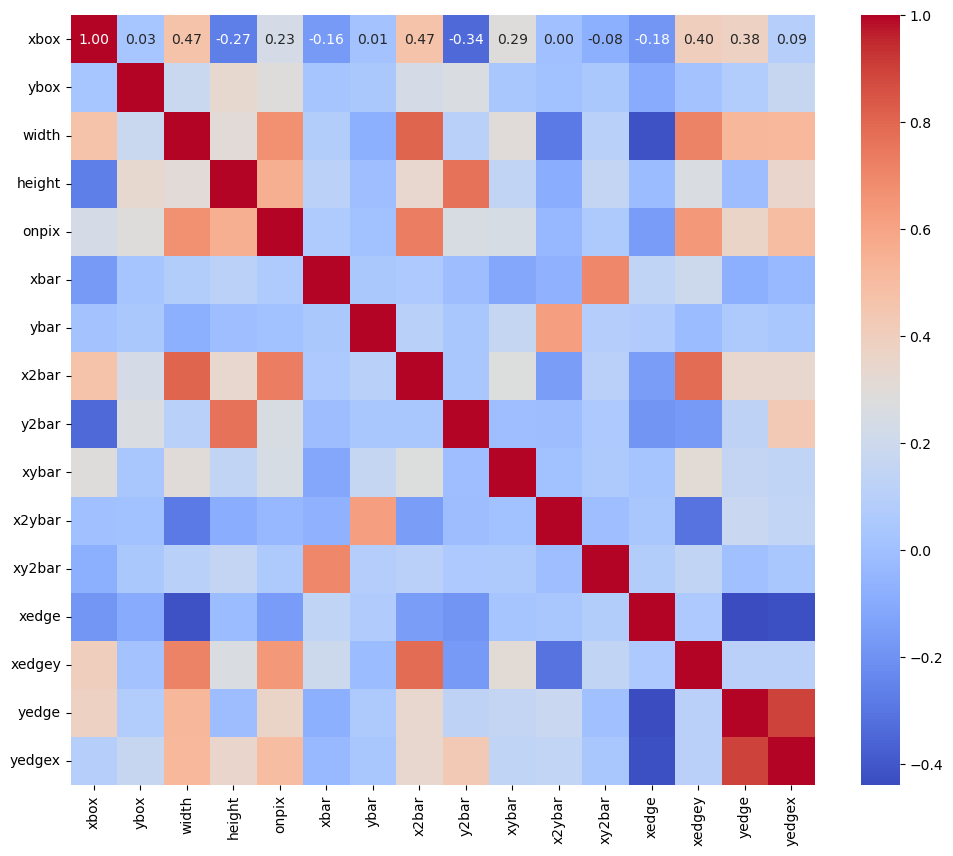

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf_norm.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataf_norm,y,test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#looking for optimal k
best_k = 1
for k in range(2, 10):
    test_knn = KNeighborsClassifier(k)
    best_knn = KNeighborsClassifier(best_k)
    
    test_knn.fit(x_train, y_train)
    best_knn.fit(x_train, y_train)
    
    if test_knn.score(x_test, y_test) > best_knn.score(x_test, y_test):
        best_k = k
        
print(best_k)

1


In [11]:
from sklearn.neighbors import KNeighborsClassifier


knn_lib=KNeighborsClassifier(best_k)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)

0.7777777777777778